**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import sklearn
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os 
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
import torch

if torch.cuda.is_available():
    print(f"GPU available: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU found")


GPU available: NVIDIA GeForce RTX 3050 Laptop GPU


**Importing necessary directories**

    The dataset contains 16012 images of 10 label, each label has been assigned a unique interger for the creation of models.


In [3]:
directories = {
    "Tomato__Target_Spot": 0,
    "Tomato__Tomato_mosaic_virus": 1,
    "Tomato__Tomato_YellowLeaf__Curl_Virus": 2,
    "Tomato_Bacterial_spot": 3,
    "Tomato_Early_blight": 4,
    "Tomato_healthy": 5,
    "Tomato_Late_blight": 6,
    "Tomato_Leaf_Mold": 7,
    "Tomato_Septoria_leaf_spot": 8,
    "Tomato_Spider_mites_Two_spotted_spider_mite": 9
}


**IMAGE PREPROCESSING & SPLITTING**


This process is part of the data preprocessing step, which is a building step in the creation of image segmentation model. The images have been subjected to grayscale conversion, histogram equalization, normalization of pixels and the resizing of image to 32x32 pixels.

The training and testings lists are initialized as empty containers, and during subsequent steps in our code, we will populate them with actual image data and their corresponding labels. 

The images are split into training(80% of images) and testing(20% of images) datasets. These datasets will be used in the CNN model.

In [4]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Assuming directories is a dictionary with folder paths as keys and labels as values
train_images = []
train_labels = []
test_images = []
test_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for directory, label in directories.items():
    # Convert relative path to absolute path
    absolute_directory = os.path.abspath(directory)
    images = []
    
    try:
        for filename in os.listdir(absolute_directory):
            if filename.endswith('.JPG') or filename.endswith('.png'):
                filepath = os.path.join(absolute_directory, filename)
                image = cv2.imread(filepath)
                
                if image is not None:
                    # Convert the image to grayscale
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                    # Apply histogram equalization if the image is in grayscale format
                    if len(image.shape) == 2:
                        image = cv2.equalizeHist(image)

                    # Normalize the pixel values to be between 0 and 1
                    image = image / 255.0

                    # Resize the image to 32x32
                    image = cv2.resize(image, (32, 32))

                    # Append the image to the list of images for this directory
                    images.append(image)
                else:
                    print(f"Warning: Failed to load image {filepath}")
    
    except FileNotFoundError:
        print(f"Directory not found: {absolute_directory}")
    except Exception as e:
        print(f"An error occurred: {e}")

    # Split the images into train and test sets
    if images:  # Ensure that there are images to split
        train_images_dir, test_images_dir, train_labels_dir, test_labels_dir = train_test_split(
            images, [label] * len(images), test_size=0.2, random_state=0
        )

        # Append the images and labels to the overall train and test sets
        train_images += train_images_dir
        test_images += test_images_dir
        train_labels += train_labels_dir
        test_labels += test_labels_dir

# Convert lists to numpy arrays and then to PyTorch tensors
train_images = torch.tensor(np.array(train_images), dtype=torch.float32).unsqueeze(1).to(device)  # Add channel dimension
test_images = torch.tensor(np.array(test_images), dtype=torch.float32).unsqueeze(1).to(device)
train_labels = torch.tensor(np.array(train_labels), dtype=torch.long).to(device)
test_labels = torch.tensor(np.array(test_labels), dtype=torch.long).to(device)

# Create TensorDataset and DataLoader for batch processing
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Now you can use train_loader and test_loader to train your model on the GPU


Images are transformed into numpy arrays because TensorFlow, the framework employed for constructing the CNN model, relies on numpy arrays as the input data format. This conversion allows for seamless integration of image data into the TensorFlow pipeline, facilitating data preprocessing and model training.

**BAR GRAPH**

This graph plots the count of images of in each label, thus helping us understand the dataset better.

C:\Users\ismaeeel\AppData\Local\Temp\ipykernel_15480\1952017039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=image_counts_list, palette='viridis')


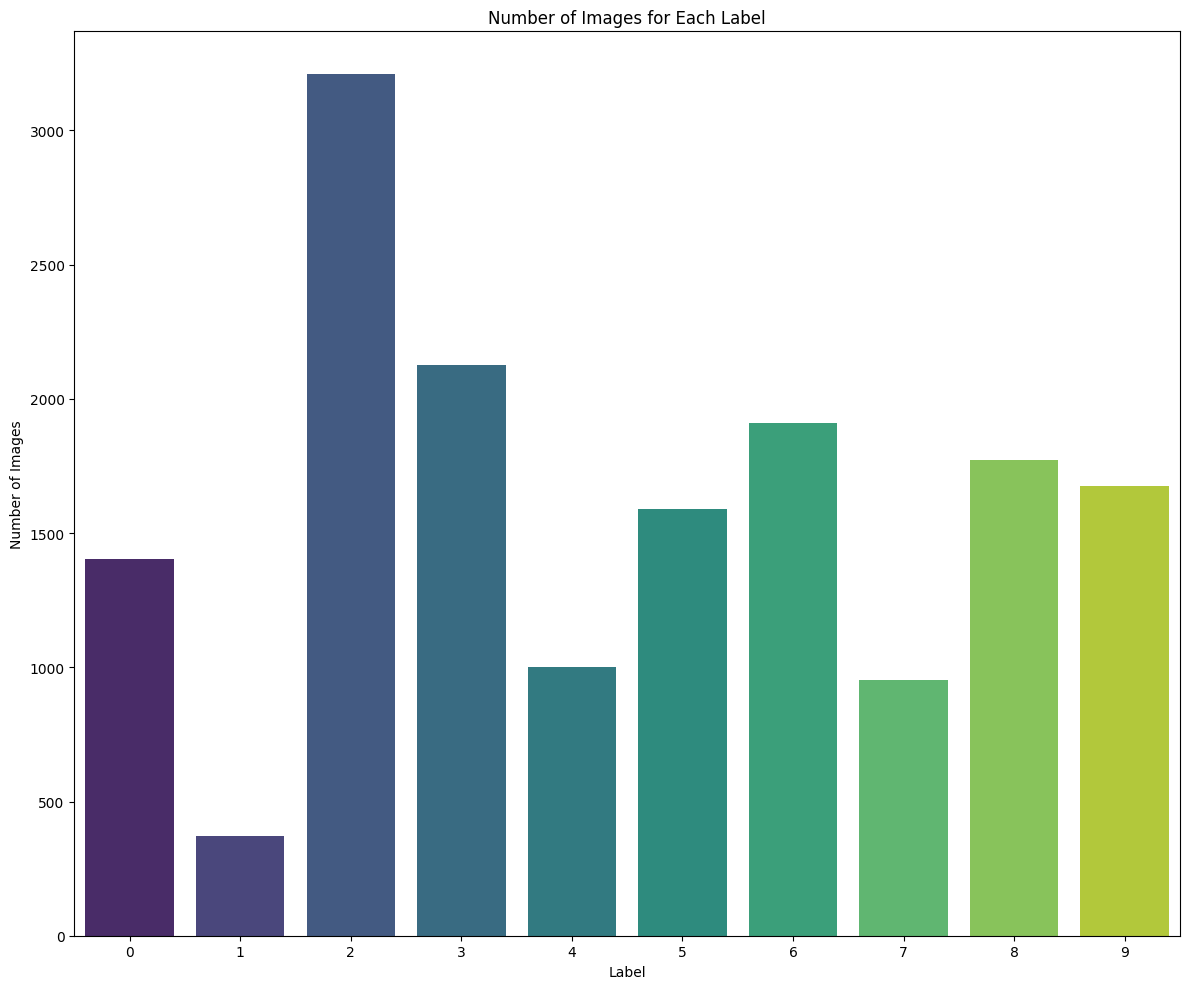

In [6]:

# Initialize a dictionary to store image counts for each folder
image_counts = {}

# Loop through each folder and count the number of images
for folder_name, label in directories.items():
    # Assume you have the images in subfolders of the current directory
    folder_path = os.path.join(folder_name)
    image_count = len(os.listdir(folder_path))
    image_counts[label] = image_count

# Extract labels and their corresponding image counts
labels = list(directories.values())
image_counts_list = list(image_counts.values())

# Create a bar graph using Seaborn with the Viridis colormap
plt.figure(figsize=(12, 10))
sns.barplot(x=labels, y=image_counts_list, palette='viridis')
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Label')
plt.tight_layout()

# Display the bar graph
plt.show()

This snippet converts the images to grayscale and displays the images with thier label names 

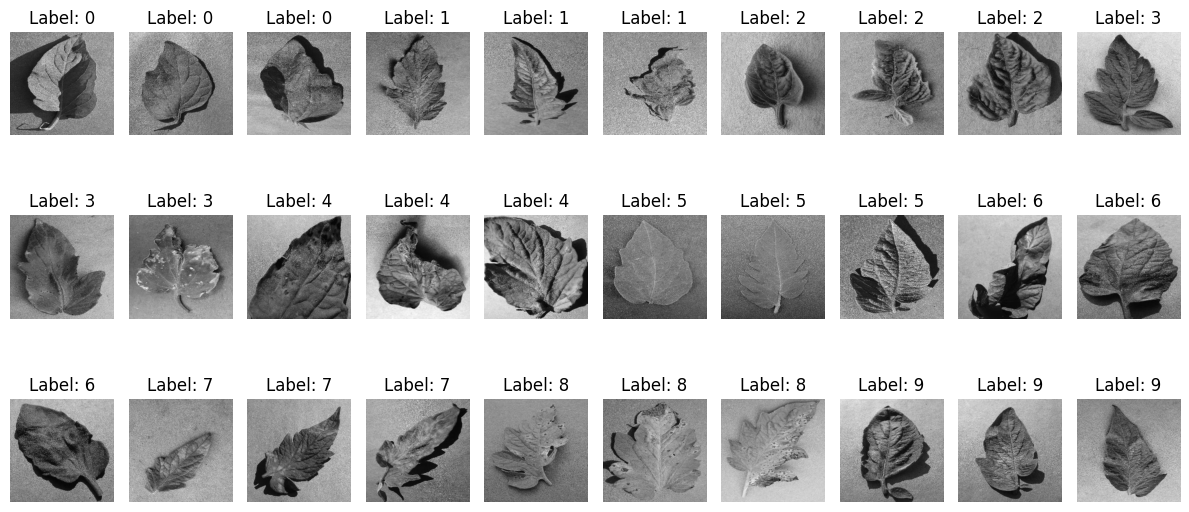

In [7]:


# Initialize lists to store the images and labels
images_to_print = []
labels_to_print = []

# Define the number of images to print per class
num_images_to_print = 3

# Loop through the directories and load images
for directory, label in directories.items():
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.JPG') or filename.endswith('.png'):
            # Load the image
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath)

            # Convert the image to grayscale
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Append the image and label to the lists
            images.append(image)
            labels_to_print.append(label)

            # Break if the desired number of images to print is reached
            if len(images) == num_images_to_print:
                break

    # Append the images to the overall list
    images_to_print.extend(images)

# Convert the lists to numpy arrays
images_to_print = np.array(images_to_print)
labels_to_print = np.array(labels_to_print)

# Display the images
plt.figure(figsize=(12, 6))
for i in range(len(images_to_print)):
    plt.subplot(num_images_to_print, len(directories), i + 1)
    plt.imshow(images_to_print[i], cmap='gray')
    plt.title(f"Label: {labels_to_print[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### **CNN**

The model reshaps the input image data into a format compatible with the CNN architecture, with each image now having dimensions of 32x32 pixels and a single channel (grayscale). The model architecture consists of multiple layers: convolutional layers followed by max-pooling layers to extract features, dropout layers for regularization, and fully connected (Dense) layers for classification.

The model is configured with a softmax activation function in the output layer for multi-class classification, where it predicts one of ten possible classes.It is compiled with the Adam optimizer and sparse categorical cross-entropy loss function.

The model is trained using the training data (train_images and train_labels) for 40 epochs, and the training progress is monitored, including accuracy, through the history variable.

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Check if GPU is available and set the device accordingly
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and will be used for training.")
else:
    print("No GPU found. Training will be performed on the CPU.")

# Reshape the images for use in a convolutional neural network
train_images = train_images.reshape(-1, 32, 32, 1)
test_images = test_images.reshape(-1, 32, 32, 1)

# Define the model architecture with additional layers and padding
CNN_model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Convert PyTorch tensors back to NumPy arrays for TensorFlow
train_images_np = train_images.cpu().numpy()
train_labels_np = train_labels.cpu().numpy()
test_images_np = test_images.cpu().numpy()
test_labels_np = test_labels.cpu().numpy()

# Train the model on the GPU using TensorFlow
history = CNN_model.fit(train_images_np, train_labels_np, epochs=10, validation_data=(test_images_np, test_labels_np))

# # Train the model on the GPU
# history = CNN_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


No GPU found. Training will be performed on the CPU.
Epoch 1/10


C:\Users\ismaeeel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


397/397 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.1983 - loss: 2.2096 - val_accuracy: 0.3656 - val_loss: 1.8883
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.3658 - loss: 1.8197 - val_accuracy: 0.4950 - val_loss: 1.5212
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.4885 - loss: 1.4808 - val_accuracy: 0.5623 - val_loss: 1.2571
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.5644 - loss: 1.2769 - val_accuracy: 0.6011 - val_loss: 1.1617
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.6092 - loss: 1.1630 - val_accuracy: 0.6571 - val_loss: 0.9936
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.6264 - loss: 1.1028 - val_accuracy: 0.6659 - val_loss: 0.9700
Epoch 7/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.6464 - loss: 1.0295 - val_accuracy: 0.6930 - val_loss: 0.9200
Epoch 8/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.6627 - loss: 0.9911 - val_accurac

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = CNN_model.evaluate(test_images, test_labels)

# Print the overall accuracy of the model on the test data
print('Test accuracy:', test_acc)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6752 - loss: 0.9170
Test accuracy: 0.6848236918449402


The model accuracy stands at 78.494% after 40 epochs. The accuracy being average can be attributed to the large dataset and it's complexity.  

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


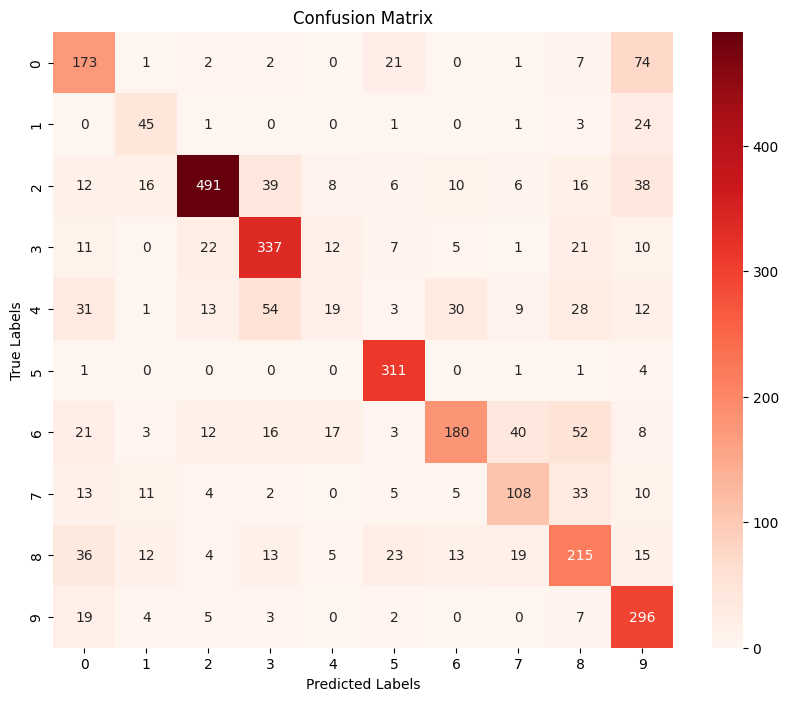

In [ ]:

# Predict the test labels
predicted_labels = CNN_model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Create a heatmap for the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print a detailed classification report
report = classification_report(test_labels, predicted_labels, target_names=[str(i) for i in range(10)])


### **ReS Net50**

ResNet-50, or Residual Network 50, is a deep convolutional neural network architecture that is highly popular for image recognition tasks. Introduced in 2015 by Kaiming He and his colleagues, ResNet-50 is part of the ResNet family, which is renowned for its innovative use of residual learning. This approach enables the network to effectively train very deep architectures by addressing the problem of vanishing gradients. ResNet-50 consists of 50 layers, including convolutional layers, pooling layers, and fully connected layers, organized into residual blocks that allow for the preservation of gradients across multiple layers. Each residual block includes a shortcut connection, bypassing one or more layers, which facilitates the learning of identity mappings, making it easier for the network to converge. This architecture has demonstrated exceptional performance on various image classification benchmarks, making it a widely adopted model in both research and industry. Its ability to achieve high accuracy with relatively efficient computation has solidified ResNet-50 as a go-to choice for tasks requiring deep learning in computer vision.

In [21]:
import cv2
import numpy as np
import os
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms

# Assuming directories is a dictionary with folder paths as keys and labels as values
train_images = []
train_labels = []
test_images = []
test_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformations to convert grayscale images to RGB and resize them
transform = transforms.Compose([
    transforms.ToPILImage(),                  # Convert numpy array to PIL Image
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
    transforms.Resize((224, 224)),             # Resize to 224x224
    transforms.ToTensor(),                    # Convert PIL Image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (ResNet's requirements)
])

for directory, label in directories.items():
    # Convert relative path to absolute path
    absolute_directory = os.path.abspath(directory)
    images = []
    
    try:
        for filename in os.listdir(absolute_directory):
            if filename.endswith('.JPG') or filename.endswith('.png'):
                filepath = os.path.join(absolute_directory, filename)
                image = cv2.imread(filepath)
                
                if image is not None:
                    # Convert the image to grayscale
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    
                    # Normalize the pixel values to be between 0 and 1
                    image = image / 255.0

                    # Resize the image to 224x224 and apply transformations
                    image = cv2.resize(image, (224, 224))
                    image = transform(image)
                    
                    # Append the image to the list of images for this directory
                    images.append(image)
                else:
                    print(f"Warning: Failed to load image {filepath}")
    
    except FileNotFoundError:
        print(f"Directory not found: {absolute_directory}")
    except Exception as e:
        print(f"An error occurred: {e}")

    # Split the images into train and test sets
    if images:  # Ensure that there are images to split
        train_images_dir, test_images_dir, train_labels_dir, test_labels_dir = train_test_split(
            images, [label] * len(images), test_size=0.2, random_state=0
        )

        # Append the images and labels to the overall train and test sets
        train_images += train_images_dir
        test_images += test_images_dir
        train_labels += train_labels_dir
        test_labels += test_labels_dir

# Convert lists to numpy arrays and then to PyTorch tensors
train_images = torch.stack(train_images).to(device)
test_images = torch.stack(test_images).to(device)
train_labels = torch.tensor(train_labels, dtype=torch.long).to(device)
test_labels = torch.tensor(test_labels, dtype=torch.long).to(device)

# Create TensorDataset and DataLoader for batch processing
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Now you can use train_loader and test_loader to train your model on the GPU


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the ResNetFineTuner model
class ResNetFineTuner(nn.Module):
    def __init__(self, num_classes):
        super(ResNetFineTuner, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        # Freeze the base model
        for param in self.resnet.parameters():
            param.requires_grad = False
        # Modify the final layer to match the number of classes
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        return self.resnet(x)

# Set up the model, loss function, and optimizer
num_classes = 10
model = ResNetFineTuner(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Initialize GradScaler for mixed precision training
scaler = GradScaler()

# Training loop
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch"):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            # Mixed precision forward pass
            with autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            # Calculate statistics
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item() * images.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = 100 * correct / total
        print(f"Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Validate the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Evaluating", unit="batch"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Train and evaluate the model
train_model(model, train_loader, criterion, optimizer, num_epochs=3)
evaluate_model(model, test_loader)


Using device: cuda


C:\Users\ismaeeel\AppData\Local\Temp\ipykernel_15480\4020923887.py:39: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Epoch 1/3:   0%|          | 0/199 [00:00<?, ?batch/s]C:\Users\ismaeeel\AppData\Local\Temp\ipykernel_15480\4020923887.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/3: 100%|██████████| 199/199 [09:20<00:00,  2.82s/batch]


Loss: 1.5158, Accuracy: 52.61%


Epoch 2/3: 100%|██████████| 199/199 [09:20<00:00,  2.82s/batch]


Loss: 0.9651, Accuracy: 69.92%


Epoch 3/3: 100%|██████████| 199/199 [09:20<00:00,  2.82s/batch]


Loss: 0.7939, Accuracy: 74.85%


Evaluating: 100%|██████████| 50/50 [04:14<00:00,  5.10s/batch]

Test Accuracy: 79.82%


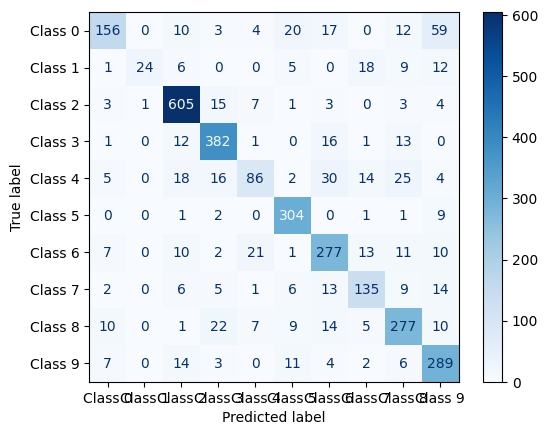

In [27]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to evaluate the model and return predictions and true labels
def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_predictions, labels=list(range(num_classes)))
    return cm

# Function to generate and plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.show()

# Assuming `model` and `test_loader` are already defined and trained
num_classes = 10  # Adjust based on your dataset
class_names = [f"Class {i}" for i in range(num_classes)]  # Adjust to match your actual class names

# Evaluate model and get confusion matrix
cm = evaluate_model(model, test_loader)

# Plot confusion matrix
plot_confusion_matrix(cm, class_names)


### **Densenet121**

DenseNet-121, short for Densely Connected Convolutional Network 121, is a deep learning architecture designed for image classification and recognition tasks. Introduced by Gao Huang and colleagues in 2017, DenseNet-121 is part of the DenseNet family, known for its unique connectivity pattern that directly connects each layer to every other layer in a feed-forward manner. This means that each layer receives input from all preceding layers and passes its feature maps to all subsequent layers. This dense connectivity results in a more efficient use of network parameters, reduces the risk of vanishing gradients, and encourages feature reuse, which leads to improved learning and performance. 

DenseNet-121, with its 121 layers, is a relatively lightweight model compared to its counterparts, yet it achieves impressive accuracy on image classification tasks. The network is composed of dense blocks, each consisting of several convolutional layers, followed by transition layers that include batch normalization, ReLU activation, and pooling operations. This architecture's efficiency and high performance have made DenseNet-121 a popular choice in computer vision applications, particularly when computational resources are limited, and a balance between accuracy and efficiency is required.

In [28]:
 import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the DenseNetFineTuner model
class DenseNetFineTuner(nn.Module):
    def __init__(self, num_classes):
        super(DenseNetFineTuner, self).__init__()
        self.densenet = models.densenet121(pretrained=True)
        # Freeze the base model
        for param in self.densenet.parameters():
            param.requires_grad = False
        # Modify the final layer to match the number of classes
        in_features = self.densenet.classifier.in_features
        self.densenet.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        return self.densenet(x)

# Set up the model, loss function, and optimizer
num_classes = 10
Densenetmodel = DenseNetFineTuner(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Densenetmodel.parameters(), lr=1e-4)

# Initialize GradScaler for mixed precision training
scaler = GradScaler()

# Training loop
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch"):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            # Mixed precision forward pass
            with autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            # Calculate statistics
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item() * images.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = 100 * correct / total
        print(f"Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Validate the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Evaluating", unit="batch"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Train and evaluate the model
train_model(Densenetmodel, train_loader, criterion, optimizer, num_epochs=3)
evaluate_model(Densenetmodel, test_loader)

Using device: cuda


C:\Users\ismaeeel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ismaeeel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\ismaeeel/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth
100%|██████████|

Loss: 1.5826, Accuracy: 51.39%


Epoch 2/3: 100%|██████████| 199/199 [06:41<00:00,  2.02s/batch]


Loss: 0.9657, Accuracy: 70.77%


Epoch 3/3: 100%|██████████| 199/199 [06:41<00:00,  2.02s/batch]


Loss: 0.7604, Accuracy: 76.56%


Evaluating: 100%|██████████| 50/50 [09:25<00:00, 11.32s/batch]

Test Accuracy: 80.60%


**VISUALIZING THE PREDICTIONS**

  1/100 [..............................] - ETA: 4s

100/100 [==============================] - 1s 11ms/step


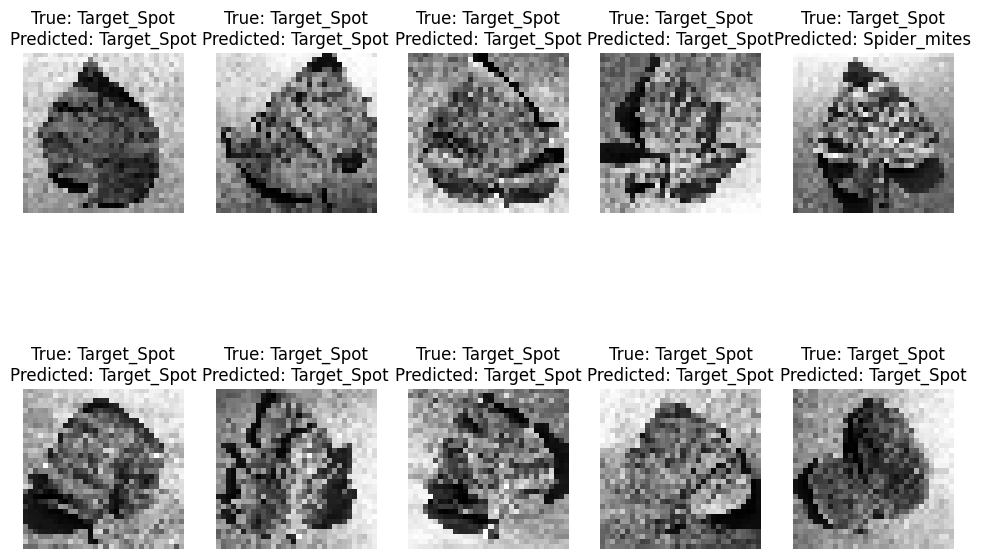

In [ ]:
# Make predictions on the test images
predicted_labels = model.predict(test_images)

# Convert predicted labels to class indices
predicted_classes = np.argmax(predicted_labels, axis=1)
import matplotlib.pyplot as plt

# Define a function to plot MRI images with their true and predicted labels
def plot_images(images, true_labels, predicted_labels, class_names):
    plt.figure(figsize=(12, 8))
    for i in range(10):  # Adjust the number of images to display as needed
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(32, 32), cmap='gray')
        plt.title(f'True: {class_names[true_labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}')
        plt.axis('off')

# Define class names for your dataset (adjust as needed)
class_names = [
    "Target_Spot",
    "Tomato_mosaic_virus",
    "Tomato_YellowLeaf__Curl_Virus",
    "Bacterial_spot",
    "Early_blight",
    "healthy",
    "Late_blight",
    "Leaf_Mold",
    "Septoria_leaf_spot",
    "Spider_mites"
]

# Plot a few MRI images with their true and predicted labels
plot_images(test_images, test_labels, predicted_classes, class_names)
plt.show()

